# MATH 210 Introduction to Mathematical Computing

## March 31, 2023

* `scipy.integrate.odeint` for Systems of ODEs
* Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## `odeint`

In MATH 210, students are expected to:

1. Rewrite higher order systems as first order systems.
2. Write a vector function `f(t,u)` which represents $\mathbf{u}' = \mathbf{f}(t,\mathbf{u})$.
3. Compute the solution with `scipy.integrate.odeint`.
4. Plot the result.

## Examples

Consider the Van der Pol equation

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

where $x(t)$ is the unknown function and $\mu$ is a parameter.

Let $u_0 = x$ and $u_1 = x'$ and write

\begin{align*}
u_0' &= u_1 \\
u_1' &= \mu(1 - u_0^2)u_1 - u_0
\end{align*}

In [2]:
mu = 2
f = lambda u,t: np.array([u[1],mu*(1 - u[0]**2)*u[1] - u[0]])

In [3]:
mu = 2
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = mu*(1 - u[0]**2)*u[1] - u[0]
    return dudt

In [4]:
u0 = [1,4]
t = np.linspace(0,10,500)
U = spi.odeint(f,u0,t)

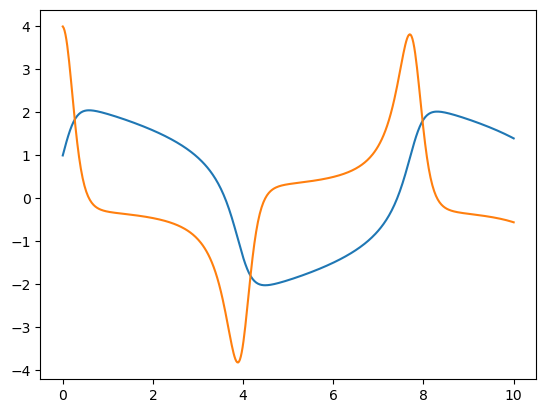

In [5]:
plt.plot(t,U)
plt.show()

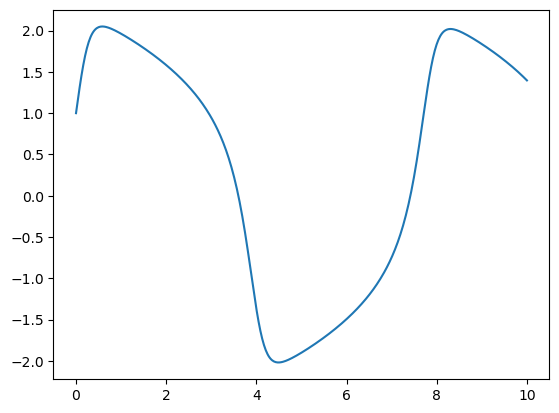

In [6]:
plt.plot(t,U[:,0])
plt.show()

## Euler's 3-body

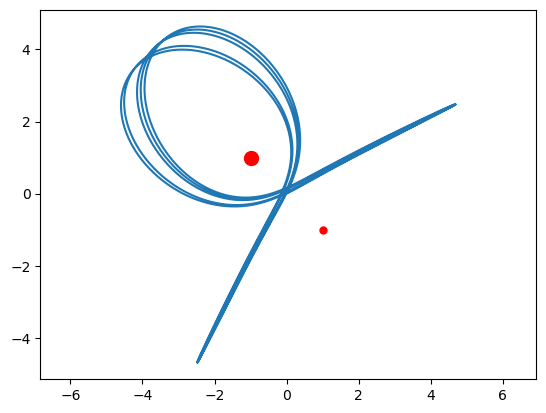

In [7]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-1,1] # Coordinates of Star 1
S2 = [1,-1] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = np.linalg.norm([u[0] - S1[0],u[2] - S1[1]])
    d2 = np.linalg.norm([u[0] - S2[0],u[2] - S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0] - S1[0])/d1**3 - G*M2*(u[0] - S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2] - S1[1])/d1**3 - G*M2*(u[2] - S2[1])/d2**3
    return dudt

u0 = [0,10,0,5] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()

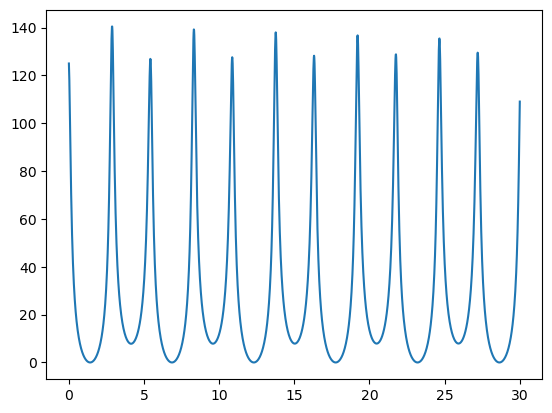

In [8]:
ke = u[:,1]**2 + u[:,3]**2
plt.plot(t,ke)
plt.show()